### Write a function to feach data.

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import warnings 
import scipy.stats as scs
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [2]:
# Suppressing warning messages

warnings.filterwarnings('ignore')

In [3]:
# setting path to folders

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
scripts_dir = parent_dir+"/scripts"
data_dir = parent_dir+"/data"

sys.path.insert(1, scripts_dir)

In [4]:
# loading scripts

from data_summarizing_functions import DataSummarizer
from processing_functions import ConditionalSPRT
from dashboard_viz import VizManager
from processing_functions import DataProcessor

sumar = DataSummarizer()
viz = VizManager()
DP = DataProcessor()

In [5]:
# loading data

original_df = pd.read_csv(data_dir+"/SmartAd_clean_data.csv")
original_df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
1,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
2,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
3,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
4,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1


In [6]:
# setting alpha and beta.
# setting up the scikit learn pipeline to chain the transformers.
alpha = 0.5
beta = 0.10
odd_ratio = 1.01
c_sprt = ConditionalSPRT()
pipe = Pipeline(
    steps=[
        ("use_custome_cleaner", FunctionTransformer(DP.clean_missing)),
        ("transform data", FunctionTransformer(DP.transform_data)),
        ("ab testing", FunctionTransformer(c_sprt.conditionalSPRT, 
            kw_args={"t1": odd_ratio, "alpha": alpha, "beta": beta})),      
        ])
res = pipe.fit_transform(original_df)

Missing values:  0
Usable rows:  1243
dataframe splitted
dataframe aggregated on datetime
bernaulli series generated
control df received 586
exposed df received 657
or, alpha, beta:  1.01 0.5 0.1
stats generated


In [7]:
print(c_sprt.get_output(res))

{'Test': 'Sequential AB testing', 'outcome': 'Unable to conclude.Needs more sample.', 'numberOfObservation': 586}


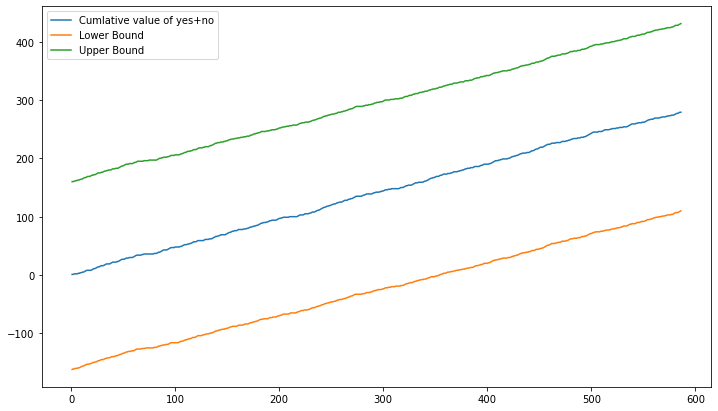

In [8]:
c_sprt.plot_output(res)